In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training5.csv")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
0,0.051008,0.116246,0.083432,0.279926,0.154995,0.154995,0.154995,0.0,0.154995,0.0,...,0.0,0.0,0.0,0.0,0.024965,0.150983,0.154995,0.149656,0.009289,208500
1,0.016630,0.117844,0.104817,0.326772,0.157125,0.157125,0.157125,0.0,0.078562,0.0,...,0.0,0.0,0.0,0.0,0.066107,0.152226,0.157125,0.151713,0.058385,181500
2,0.049759,0.113855,0.084291,0.374195,0.151807,0.000000,0.151807,0.0,0.151807,0.0,...,0.0,0.0,0.0,0.0,0.116390,0.146049,0.151807,0.146578,0.012738,223500
3,0.058532,0.114235,0.074714,0.315258,0.152313,0.000000,0.152313,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.024340,0.147534,0.152313,0.000000,0.166141,140000
4,0.044571,0.102460,0.093669,0.430932,0.136614,0.000000,0.136614,0.0,0.068307,0.0,...,0.0,0.0,0.0,0.0,0.139862,0.129529,0.136614,0.131908,0.013100,250000


In [3]:
corr=df.corr()

In [4]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
SalePrice,-0.149958,-0.395050,0.113581,0.317537,-0.488240,-0.317057,-0.200098,-0.014314,-0.165933,0.005742,...,0.042390,0.090962,0.085395,-0.026840,-0.098794,-0.573913,-0.307684,-0.001034,-0.571548,1.000000
GrLivArea,0.109397,-0.208915,0.099421,-0.015611,-0.224525,-0.168171,-0.128206,-0.020050,-0.100007,-0.048385,...,0.007700,0.052381,0.053335,-0.037432,-0.011940,-0.271855,-0.175348,-0.041676,-0.228113,0.589120
GarageArea,-0.102609,-0.272965,0.163152,0.069512,-0.206190,-0.167510,-0.007230,0.000376,-0.087617,-0.063508,...,0.027967,0.018784,-0.006017,-0.042975,-0.030864,-0.209394,-0.180956,0.078789,-0.504633,0.505566
GarageCars,-0.025598,-0.226690,0.131242,0.014013,-0.165928,-0.177420,-0.005890,0.001519,-0.085281,-0.069889,...,0.027165,0.015425,-0.017865,-0.060124,-0.016287,-0.172838,-0.147486,0.097013,-0.558473,0.504552
TotalBsmtSF,-0.254642,-0.150886,0.175788,0.059492,-0.126953,-0.170931,0.001812,-0.022100,-0.037908,-0.047332,...,0.030134,0.062056,0.009560,-0.043781,-0.016115,-0.159271,-0.161371,0.024657,-0.400962,0.500621
OverallQual,0.158913,-0.069057,0.056226,-0.338996,0.145592,-0.086879,0.110167,-0.016284,0.046199,-0.166283,...,0.006592,0.005374,-0.027426,-0.061161,0.091586,0.161213,0.009252,0.185739,-0.498392,0.488216
1stFlrSF,-0.244680,-0.102913,0.205277,0.009925,-0.105627,-0.135931,-0.032153,0.002520,-0.040561,-0.039258,...,0.042364,0.054946,0.018800,-0.055110,0.003352,-0.132602,-0.181235,-0.006951,-0.282207,0.436239
MasVnrArea,0.024757,-0.156048,0.043841,0.025674,-0.192391,-0.113695,-0.023828,0.060766,-0.054439,-0.049446,...,0.018037,0.053694,-0.018137,-0.033129,-0.054778,-0.213859,-0.144448,-0.013854,-0.322663,0.426354
Fireplaces,-0.061848,-0.126831,0.074122,0.179437,-0.233658,-0.209772,-0.134864,0.013120,-0.094607,0.033067,...,0.008254,0.169294,0.050150,-0.006998,-0.028060,-0.284568,-0.110770,-0.000086,-0.176910,0.399534
FullBath,0.166597,-0.228867,0.023200,-0.132801,-0.062543,-0.136374,0.037362,-0.034132,0.003399,-0.118610,...,0.025886,-0.061983,-0.011930,-0.036091,0.019664,-0.081209,-0.083164,0.089712,-0.480101,0.395909


In [5]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [6]:
model=DecisionTreeRegressor(criterion='absolute_error',splitter='random',max_features='log2')

In [7]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [8]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'GrLivArea', 'GarageArea', 'GarageCars', 'TotalBsmtSF',
       'OverallQual', '1stFlrSF', 'MasVnrArea', 'Fireplaces', 'FullBath'],
      dtype='object')

In [9]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,38598.910959,65904.269511,0.433743
1,11,36593.294521,65097.232383,0.447527
2,12,31983.578767,48112.323510,0.698214
3,13,35783.482877,63791.177203,0.469473
4,14,34866.493151,57813.983095,0.564235
...,...,...,...,...
105,115,30755.945205,52037.688160,0.646961
106,116,31771.386986,45614.570840,0.728735
107,117,33494.541096,60842.604203,0.517384
108,118,32494.431507,56694.444884,0.580949


In [10]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
65,75,27895.575342,40871.278168,0.782218
71,81,27901.462329,41711.835235,0.773168
64,74,28227.195205,41182.767088,0.778886
69,79,29048.808219,46380.514376,0.719549
85,95,29086.068493,42954.020761,0.759456
...,...,...,...,...
52,62,38773.455479,60900.081337,0.516472
46,56,39044.390411,60364.970602,0.524932
34,44,39551.589041,66250.948497,0.427770
7,17,39623.133562,68605.586817,0.386372


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26328\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26328\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


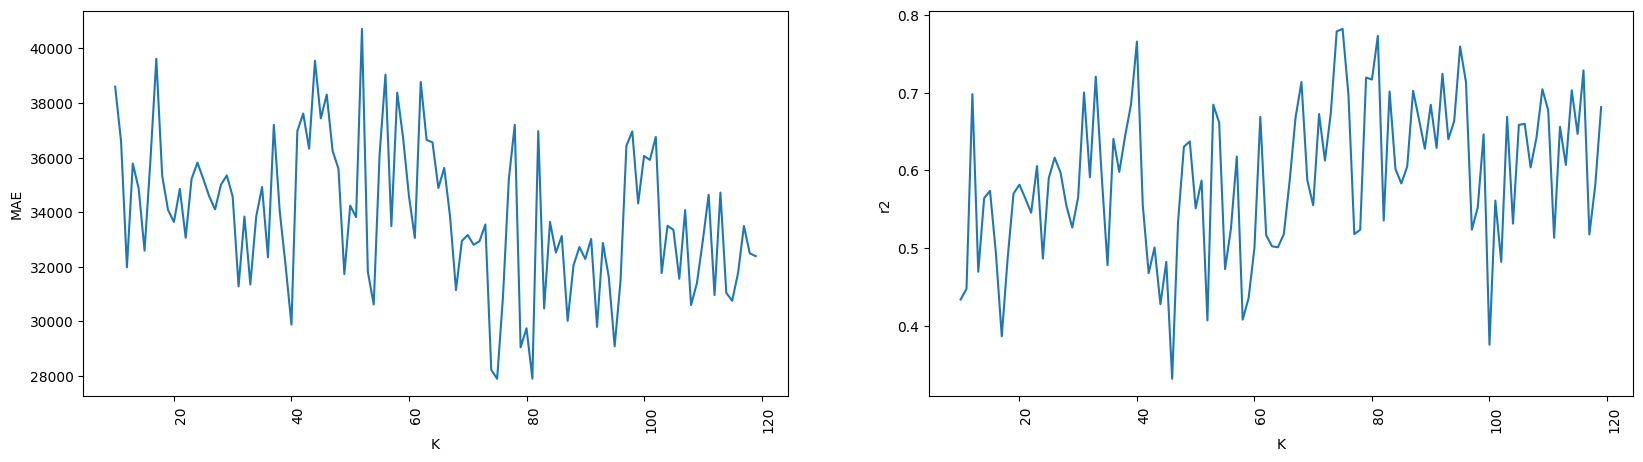

In [11]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [12]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass       1.421058e-03
MSZoning         8.135175e-04
LotFrontage      6.080463e-04
LotArea          1.746308e-02
Street           3.336710e-04
                     ...     
YrSold           3.250450e-04
SaleType         1.130013e-03
SaleCondition    1.792836e-03
Ageofhouse       3.218771e-03
SalePrice        6.306789e+09
Length: 75, dtype: float64

In [13]:
varr.loc[varr > 0.1].index

Index(['SalePrice'], dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [15]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['SalePrice'], dtype='object')

In [16]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,34657.407534,52992.535474,0.633887
1,101,33631.794521,53944.619712,0.620613
2,102,30987.866438,48513.461478,0.693161
3,103,34676.595890,59973.504185,0.531073
4,104,32472.095890,48975.503771,0.687288
...,...,...,...,...
395,495,51481.113014,85231.317728,0.052925
396,496,55042.301370,86976.205822,0.013750
397,497,53487.273973,84916.006129,0.059919
398,498,53634.527397,86447.812781,0.025697


In [17]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
43,143,27968.750000,46588.578412,0.717027
132,232,28059.397260,42378.500025,0.765859
20,120,29256.410959,47534.124853,0.705424
52,152,29339.208904,43693.184736,0.751106
16,116,29558.924658,47213.006072,0.709391
...,...,...,...,...
389,489,56266.428082,87972.873808,-0.008983
388,488,56635.202055,88327.603559,-0.017136
387,487,56786.297945,89494.872374,-0.044197
372,472,57520.065068,88070.984048,-0.011234


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26328\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26328\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


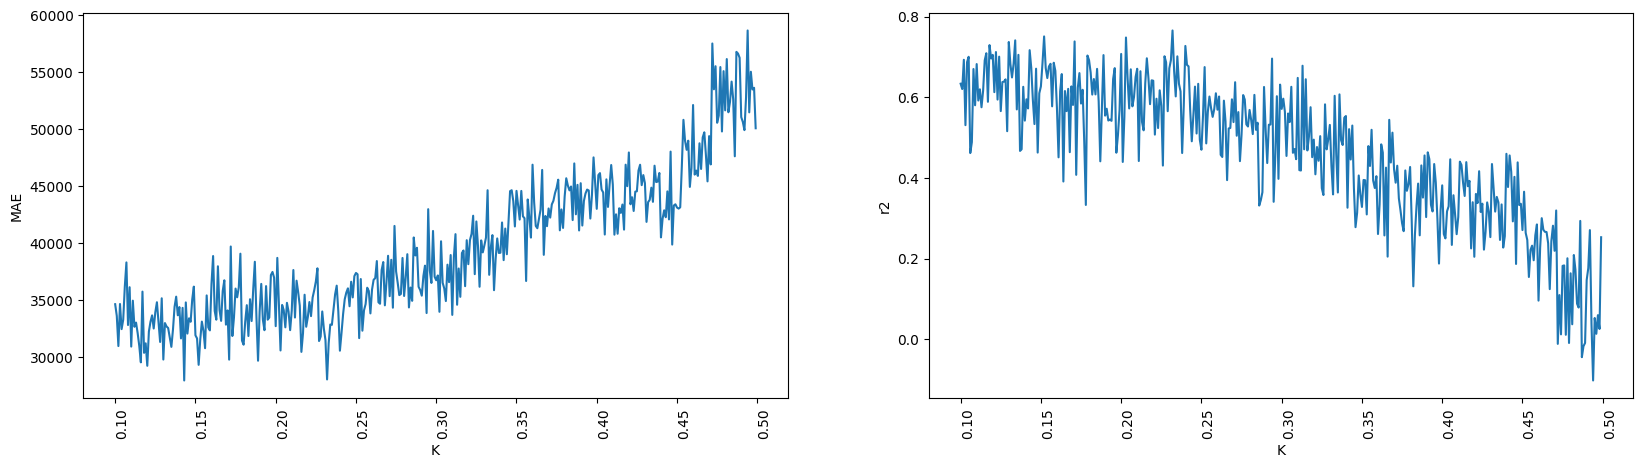

In [18]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


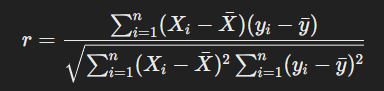

### Using numpy

In [19]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [20]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.48821565211312173


In [21]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

[]

### Using sklearn

In [22]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'], dtype=object)

In [23]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,31988.726027,49908.892419,0.675255
1,6,35238.856164,56060.850144,0.590263
2,7,44533.657534,71953.613483,0.325019
3,8,32779.154110,52659.409443,0.638475
4,9,32135.869863,48967.049977,0.687396
...,...,...,...,...
110,115,33716.702055,53767.179271,0.623105
111,116,32618.078767,51128.866353,0.659185
112,117,31884.897260,47764.580458,0.702561
113,118,34119.270548,52703.885589,0.637864


In [24]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
88,93,28000.756849,41223.127454,0.778452
28,33,28551.085616,46085.042014,0.723111
95,100,29375.654110,43505.682879,0.753238
104,109,29507.434932,50373.244964,0.669184
96,101,29600.729452,46004.183599,0.724081
...,...,...,...,...
16,21,38738.174658,71553.655347,0.332502
53,58,39038.811644,65443.453112,0.441634
36,41,39178.770548,62116.146502,0.496969
57,62,39181.085616,58274.979587,0.557258


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26328\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26328\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


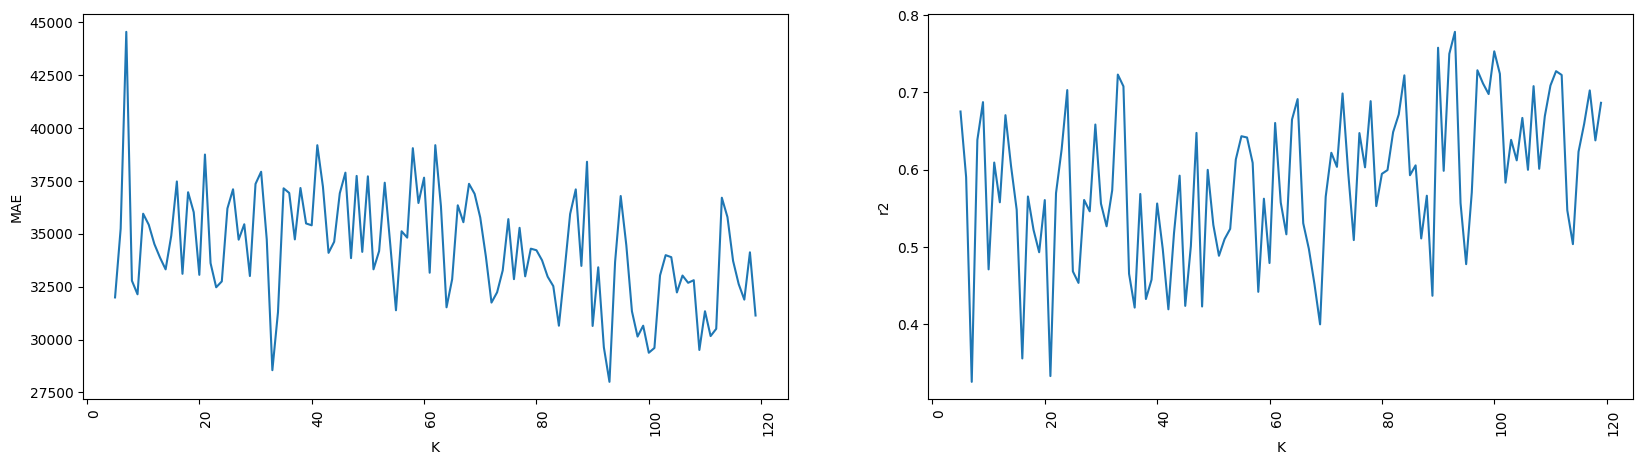

In [25]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

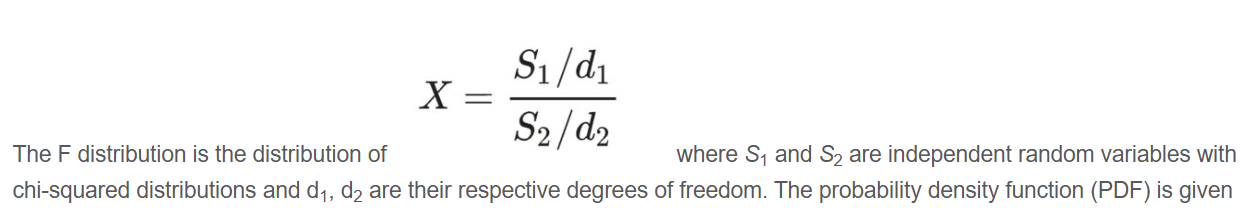

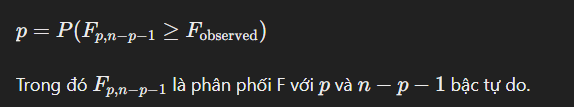

In [26]:
from sklearn.feature_selection import f_regression

In [27]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,29551.136986,46734.718131,0.715249
1,6,30493.097603,45637.397130,0.728464
2,7,30693.181507,52492.148073,0.640768
3,8,31343.188356,47997.888118,0.699648
4,9,30582.571918,47003.542618,0.711964
...,...,...,...,...
110,115,30448.993151,45151.570936,0.734214
111,116,35832.126712,67787.179798,0.400925
112,117,37604.219178,61853.543030,0.501213
113,118,33244.023973,50281.796744,0.670384


In [28]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
23,28,26716.273973,40973.003131,0.781132
44,49,27884.123288,45815.291544,0.726343
98,103,28137.325342,40547.520400,0.785654
35,40,28194.448630,45680.540480,0.727950
18,23,28352.845890,45776.958622,0.726800
...,...,...,...,...
48,53,37585.537671,64663.927786,0.454857
112,117,37604.219178,61853.543030,0.501213
91,96,37685.359589,62820.586390,0.485494
53,58,37906.263699,61054.262743,0.514020


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26328\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26328\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


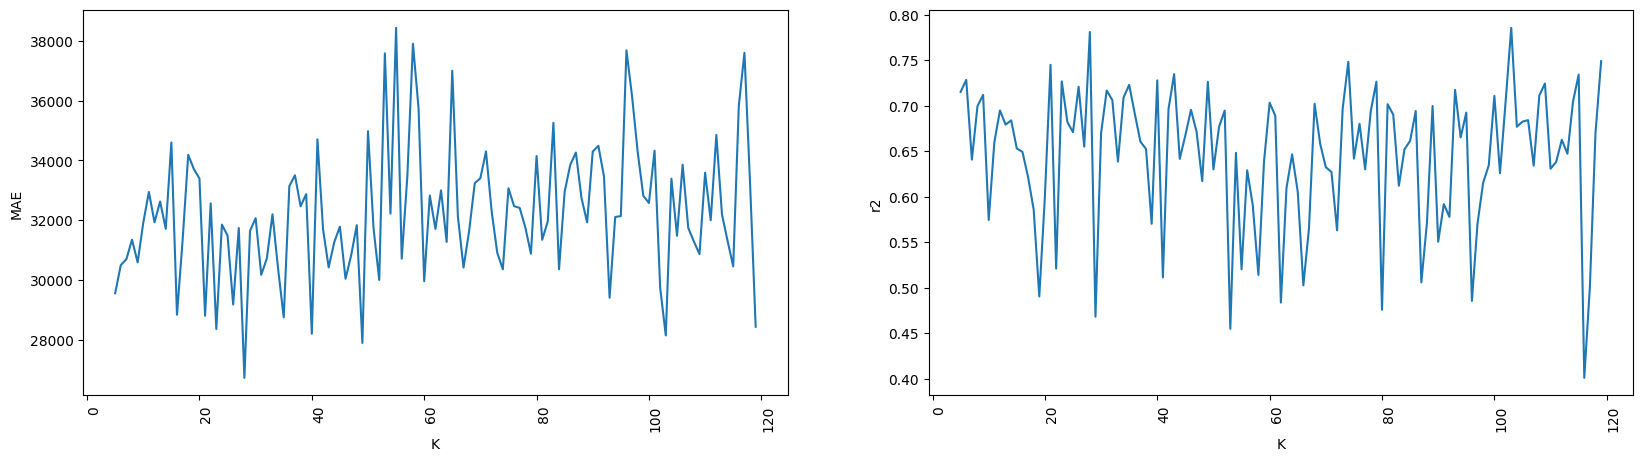

In [29]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

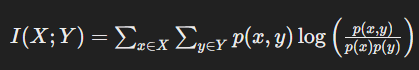

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

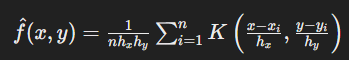

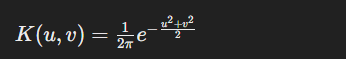

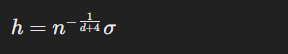

In [30]:
all_col=df.columns
all_col

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [31]:
from sklearn.feature_selection import mutual_info_regression

In [32]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,38562.969178,64065.391377,0.464902
1,6,34102.318493,48823.933651,0.689221
2,7,35600.023973,60182.362067,0.527801
3,8,29358.520548,47356.095008,0.707627
4,9,32217.815068,52589.743869,0.639431
...,...,...,...,...
110,115,33448.027397,56160.214964,0.588809
111,116,29346.910959,43564.382804,0.752572
112,117,33453.520548,51054.870722,0.660171
113,118,32349.191781,53273.338449,0.629996


In [33]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [34]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
41,46,27403.140411,41622.070307,0.774143
74,79,28411.561644,41658.249355,0.773750
59,64,28586.095890,44152.495883,0.745846
8,13,28730.390411,48007.685424,0.699525
107,112,29266.116438,45991.957691,0.724228
...,...,...,...,...
63,68,36898.743151,59436.009002,0.539441
66,71,36922.945205,64673.133837,0.454702
104,109,37341.578767,68121.599904,0.394999
21,26,37387.989726,57219.728641,0.573148


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26328\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26328\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


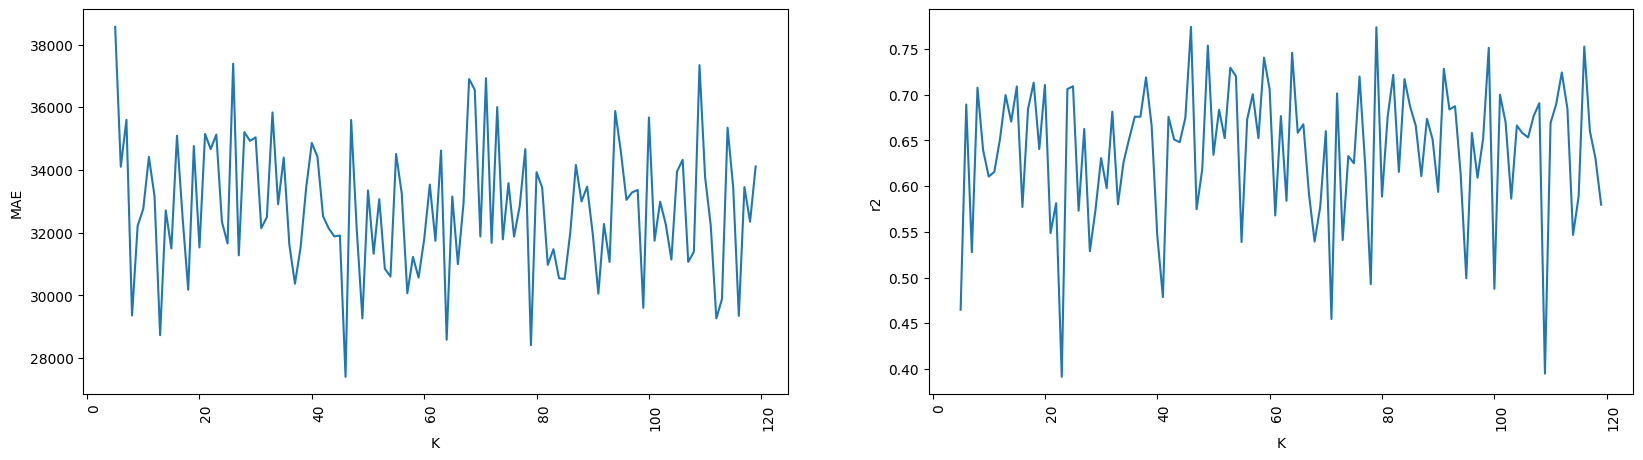

In [35]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [36]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,33486.851027,52840.300258,0.635987
1,6,30848.821918,48806.875191,0.689438
2,7,31759.996575,48543.677210,0.692779
3,8,35324.150685,58702.112897,0.550744
4,9,32119.191781,56446.864518,0.584601
...,...,...,...,...
110,115,33633.143836,56099.014733,0.589705
111,116,33541.866438,57154.550185,0.574119
112,117,37123.773973,69512.773410,0.370036
113,118,33971.434932,51615.333079,0.652669


In [37]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,32216.571918,51029.290761,0.660511
1,6,31696.952055,51785.612944,0.650373
2,7,30930.285959,45474.885169,0.730394
3,8,28150.852740,41612.531800,0.774247
4,9,26277.441781,39881.420468,0.792639
...,...,...,...,...
110,115,33571.458904,57774.979377,0.564823
111,116,32946.318493,53217.789456,0.630768
112,117,32988.753425,50576.188337,0.666513
113,118,34779.452055,56433.891155,0.584792


In [38]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,38562.969178,64065.391377,0.464902
1,6,34102.318493,48823.933651,0.689221
2,7,35600.023973,60182.362067,0.527801
3,8,29358.520548,47356.095008,0.707627
4,9,32217.815068,52589.743869,0.639431
...,...,...,...,...
110,115,33448.027397,56160.214964,0.588809
111,116,29346.910959,43564.382804,0.752572
112,117,33453.520548,51054.870722,0.660171
113,118,32349.191781,53273.338449,0.629996


In [39]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,33486.851027,52840.300258,0.635987,32216.571918,51029.290761,0.660511
1,6,30848.821918,48806.875191,0.689438,31696.952055,51785.612944,0.650373
2,7,31759.996575,48543.677210,0.692779,30930.285959,45474.885169,0.730394
3,8,35324.150685,58702.112897,0.550744,28150.852740,41612.531800,0.774247
4,9,32119.191781,56446.864518,0.584601,26277.441781,39881.420468,0.792639
...,...,...,...,...,...,...,...
110,115,33633.143836,56099.014733,0.589705,33571.458904,57774.979377,0.564823
111,116,33541.866438,57154.550185,0.574119,32946.318493,53217.789456,0.630768
112,117,37123.773973,69512.773410,0.370036,32988.753425,50576.188337,0.666513
113,118,33971.434932,51615.333079,0.652669,34779.452055,56433.891155,0.584792


In [40]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,33486.851027,52840.300258,0.635987,32216.571918,51029.290761,0.660511,38562.969178,64065.391377,0.464902
1,6,30848.821918,48806.875191,0.689438,31696.952055,51785.612944,0.650373,34102.318493,48823.933651,0.689221
2,7,31759.996575,48543.677210,0.692779,30930.285959,45474.885169,0.730394,35600.023973,60182.362067,0.527801
3,8,35324.150685,58702.112897,0.550744,28150.852740,41612.531800,0.774247,29358.520548,47356.095008,0.707627
4,9,32119.191781,56446.864518,0.584601,26277.441781,39881.420468,0.792639,32217.815068,52589.743869,0.639431
...,...,...,...,...,...,...,...,...,...,...
110,115,33633.143836,56099.014733,0.589705,33571.458904,57774.979377,0.564823,33448.027397,56160.214964,0.588809
111,116,33541.866438,57154.550185,0.574119,32946.318493,53217.789456,0.630768,29346.910959,43564.382804,0.752572
112,117,37123.773973,69512.773410,0.370036,32988.753425,50576.188337,0.666513,33453.520548,51054.870722,0.660171
113,118,33971.434932,51615.333079,0.652669,34779.452055,56433.891155,0.584792,32349.191781,53273.338449,0.629996


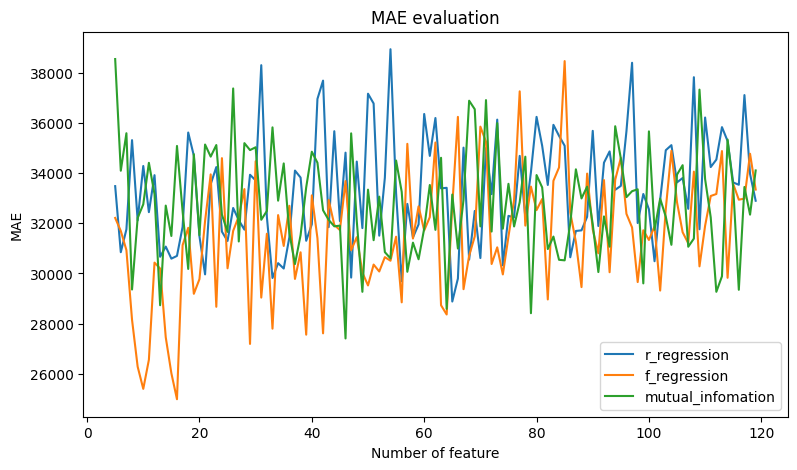

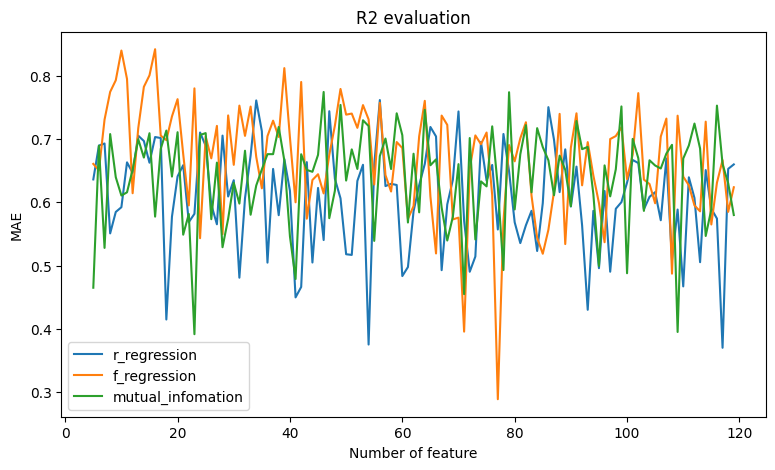

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()